# Hough Transforms and Fourier Methods

In [1]:
import numpy as np
import matplotlib.pyplot as plot
import cv2 as cv

### Question 1: Sketch lines of an Edge Map

In [2]:
heat_map = np.zeros((10, 20))

def create_mc_line(gradient, constant):
    heat_map = np.zeros((20, 10))

    for x in range(heat_map.shape[0]):
        y = int(gradient * x + constant)
        
        if y in range(heat_map.shape[1]):
            heat_map[x, y] = 1
    
    return heat_map

def sketch_mc_space(edge_point):
    y_coord, x_coord = edge_point
    heat_map = np.zeros((20, 10))

    for angle in np.linspace(0, 2 * np.pi, 10):
        m = np.tan(angle)
        c = y_coord - (x_coord * m)
        np.add(heat_map, create_mc_line(m, c), out=heat_map)

    return heat_map


#### Create heat map for all edge points

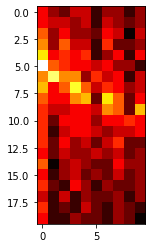

In [3]:
edge_points = [(0, 5.5), (1, 6), (2.5, 6.5), (3.5, 7), (4.5, 7.5), (6, 8), (7.5, 8.5), (9, 9), (11.9, 9.5), (14.3, 10)]

total_heat_map = np.zeros((20, 10))

for edge_point in edge_points:
    np.add(total_heat_map, sketch_mc_space(edge_point), out=total_heat_map)

plot.imshow(total_heat_map, cmap='hot')
plot.show()

The result of the heat map clearly shows a line of points touching the top edge of the image with a negative gradient. Therefore, the line the edge points all relate to can be found by determining how well a `(m, c)` pair from a single edge point correlates with all other points.

### Question 2: Process an image in the frequency domain.

(-0.5, 1919.5, 1079.5, -0.5)

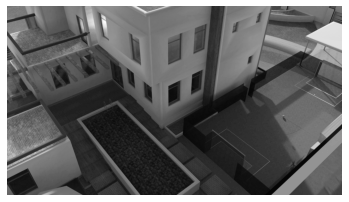

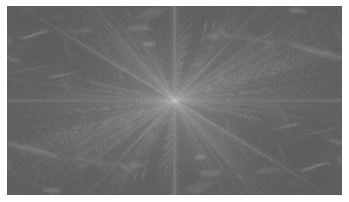

In [4]:
image = cv.imread("./random_image.png", 0)

image_transform_unshifted = np.fft.fft2(image)
image_transform = np.fft.fftshift(image_transform_unshifted)

image_transform_magnitude = 20 * np.log(np.abs(image_transform))

image_fig, image_axis = plot.subplots()
image_axis.imshow(image, cmap='gray')

image_axis.axis("off")

transform_fig, transform_axis = plot.subplots()
transform_axis.imshow(image_transform_magnitude, cmap='gray')

transform_axis.axis("off")

#### Create a smoothed image

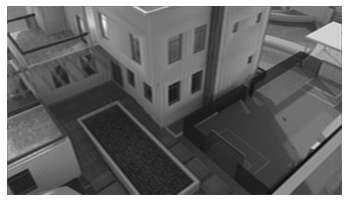

In [5]:
def square_distance(a, b):
    return np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

def low_pass_mask(image_size, cutoff):
    image_height, image_width = image_size
    image_centre = image_height // 2, image_width // 2

    mask = np.zeros(image_size)

    for i in range(image_height):
        for j in range(image_width):
            if square_distance((i, j), image_centre) < cutoff:
                mask[i, j] = 1

    return mask

smooth_image_transform = image_transform * low_pass_mask(image_transform.shape, 80)

smooth_image_transform_unshifted = np.fft.ifftshift(smooth_image_transform)
smooth_image = np.real(np.fft.ifft2(smooth_image_transform_unshifted))

smoothed_fig, smoothed_axis = plot.subplots()
smoothed_axis.imshow(smooth_image, cmap='gray')

smoothed_axis.axis("off")
plot.show()


#### Create an edge detector

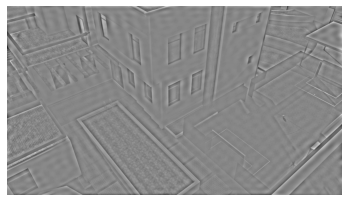

In [6]:
def high_pass_mask(image_size, cutoff):
    image_height, image_width = image_size
    image_centre = image_height // 2, image_width // 2

    mask = np.zeros(image_size)

    for i in range(image_height):
        for j in range(image_width):
            if square_distance((i, j), image_centre) > cutoff:
                mask[i, j] = 1

    return mask

edges_image_transform = image_transform * high_pass_mask(image_transform.shape, 30)

edges_image_transform_unshifted = np.fft.ifftshift(edges_image_transform)
edges_image = np.real(np.fft.ifft2(edges_image_transform_unshifted))

edges_fig, edges_axis = plot.subplots()
edges_axis.imshow(edges_image, cmap='gray')

edges_axis.axis("off")
plot.show()